# PUI Fall 2017 HW 5-1
### Yuwen Chang (ywc249)
### October 2017
### Objective: test the Z test

In [1]:
from __future__ import print_function, division

import numpy as np
import pandas as pd
import pylab as pl
import scipy.stats as st

%pylab inline

Populating the interactive namespace from numpy and matplotlib


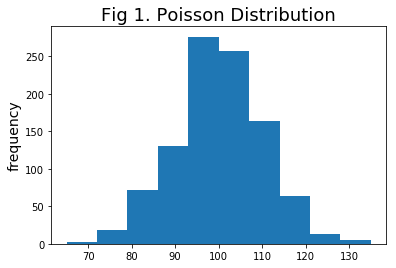

In [2]:
# plot poisson distribution
np.random.seed(999)
dist_p = st.poisson.rvs(mu=100,size=1000)

pl.hist(dist_p)
pl.title('Fig 1. Poisson Distribution', fontsize=18)
pl.xlabel('')
pl.ylabel('frequency', fontsize=14);

### Fig 1. Poisson Distribution
This is a poisson distribution histogram with a mean of 100

In [3]:
# create a function for calculating Z
def calc_z(sample, mu, std):
    """Calculates the z score of a given sample"""
    z = np.sqrt(len(sample)) * (mu - sample.mean()) / (std)
    return z

In [4]:
# calculate z scores and means for 1,000 poisson samples
np.random.seed(999)
z = np.zeros(1000)
means = np.zeros(1000)

size = 1000
mu = 100
std = np.sqrt(mu)

for i in range(0, 1000):
    poisson = st.poisson.rvs(mu=mu,size=size)
    z[i] = calc_z(poisson, mu, std)
    means[i] = poisson.mean()

z

array([  1.30602067e+00,  -4.42718872e-01,   1.35977939e+00,
         5.34424925e-01,   1.03090252e+00,   5.34424925e-01,
         8.34841302e-01,   8.25354469e-01,   8.44328135e-01,
        -6.35617810e-01,  -7.58946638e-01,   2.64998868e+00,
        -2.78280434e-01,  -9.96117463e-01,  -9.48683298e-03,
        -1.67600716e-01,  -2.34008547e-01,   2.84604989e-02,
        -6.70402864e-01,   3.47850543e-02,   3.63661931e-01,
         1.65387122e+00,  -3.57337376e-01,  -1.29653384e+00,
         5.97670478e-01,  -1.56216516e+00,  -2.43495380e-01,
         5.05964426e-02,  -2.57409402e+00,   8.91762300e-01,
         7.81082582e-01,   5.50236313e-01,  -6.03995033e-01,
         6.00832755e-01,  -1.80249827e-01,   5.18613536e-01,
         3.00416378e-01,  -5.50236313e-01,   1.48627050e-01,
        -5.05964426e-02,  -1.54951605e+00,  -4.77503927e-01,
        -2.29897586e+00,  -2.62469046e-01,   6.64078309e-02,
        -5.31262647e-01,   9.23385077e-01,   3.28876877e-01,
        -9.83468352e-01,

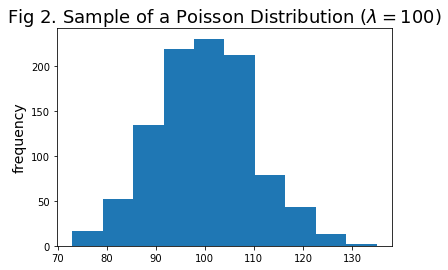

In [5]:
# plot one of the samples
pl.hist(poisson)
pl.title('Fig 2. Sample of a Poisson Distribution ($\lambda = 100$)', fontsize=18)
pl.xlabel('')
pl.ylabel('frequency', fontsize=14);

### Fig 2. Sample of a Poisson Distribution ($\lambda = 100$)
This is the poisson distribution of the last sample from the previous sampling. Looks like a normal distribution.

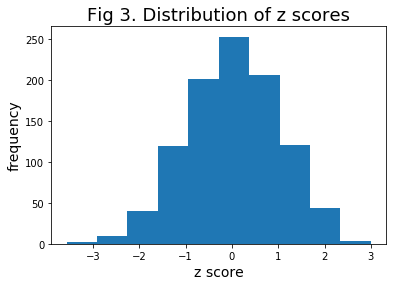

In [6]:
# plot the distribution of z statistics
pl.hist(z);
pl.title('Fig 3. Distribution of z scores', fontsize=18)
pl.xlabel('z score', fontsize=14)
pl.ylabel('frequency', fontsize=14);

### Fig 3. Distribution of z scores
This is the distribution of the z-scores of all samples from the previous sampling. Looks like a normal distribution.

In [7]:
# assess the goodnes of fit against the Gaussian model with KS test
st.kstest(z,'norm')

KstestResult(statistic=0.026043961659314108, pvalue=0.50629355480767047)

### With a KS test, we have a high p-value (0.506) that exceeds 0.05; therefore, we are not able to reject the null hypothesis that the two distributions are identical. In other words, we can not deny that the z-score distribution is identical to the normal distribution under the significance level of 0.05. We may say they are identical for now.

In [8]:
# find the best fit values for the model parameters (mean and standard deviation) by minimizing the model chi square.